In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, confusion_matrix
from wordcloud import WordCloud
import gensim

warnings.filterwarnings("ignore")



In [23]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test - Copy.csv")



In [24]:
# Checking the shapes of the datasets
print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)



Train data shape: (31962, 3)
Test data shape: (13, 2)


In [25]:
# Displaying the first 10 rows of train_data
print("Train data head:")
print(train_data.head(10))



Train data head:
   id  label                                              tweet
0   1      0   @user when a father is dysfunctional and is s...
1   2      0  @user @user thanks for #lyft credit i can't us...
2   3      0                                bihday your majesty
3   4      0  #model   i love u take with u all the time in ...
4   5      0             factsguide: society now    #motivation
5   6      0  [2/2] huge fan fare and big talking before the...
6   7      0   @user camping tomorrow @user @user @user @use...
7   8      0  the next school year is the year for exams.ð...
8   9      0  we won!!! love the land!!! #allin #cavs #champ...
9  10      0   @user @user welcome here !  i'm   it's so #gr...


In [26]:
# Displaying the first 10 rows of test_data
print("Test data head:")
print(test_data.head(10))



Test data head:
   id                                              tweet
0   1  Cristiano Ronaldo has joined Al Nassr Club! Th...
1   2  Al Nassr Club has signed Cristiano Ronaldo! Th...
2   3  Cristiano Ronaldo is officially a Al Nassr pla...
3   4  Welcome to Al Nassr, Cristiano Ronaldo! The cl...
4   5  Cristiano Ronaldo is set to make his debut for...
5   6  Al Nassr Club has just signed Cristiano Ronald...
6   7  Cristiano Ronaldo is one of the greatest playe...
7   8  We are excited to have Cristiano Ronaldo join ...
8   9  We are confident that Cristiano Ronaldo will b...
9  10  "This is a sign that the Saudi Professional Le...


In [27]:
#pre prossing it removes any entry that doesnt have any weight
# Checking for missing values in train_data
print("Train data missing values:")
print(train_data.isnull().any())


Train data missing values:
id       False
label    False
tweet    False
dtype: bool


In [28]:
# Checking for missing values in test_data
print("Test data missing values:")
print(test_data.isnull().any())



Test data missing values:
id       False
tweet    False
dtype: bool


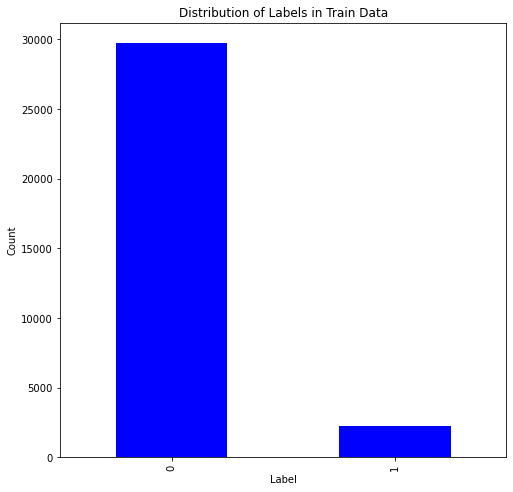

In [29]:
# Checking the distribution of labels in train_data
train_data['label'].value_counts().plot.bar(color='blue', figsize=(8, 8))
plt.title("Distribution of Labels in Train Data")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()


In [30]:
#it will take the length of the string ( how long is the sentence)
# Checking the distribution of tweet lengths in train_data and test_data
length_train = train_data['tweet'].str.len()
length_test = test_data['tweet'].str.len()

In [31]:
#it will take the length of the string ( how long is the sentence)
# Adding a column for tweet length in train_data and test_data
train_data['length'] = length_train
test_data['length'] = length_test



In [32]:
# Displaying the updated train_data
print("Updated Train Data:")
print(train_data.head())


Updated Train Data:
   id  label                                              tweet  length
0   1      0   @user when a father is dysfunctional and is s...     102
1   2      0  @user @user thanks for #lyft credit i can't us...     122
2   3      0                                bihday your majesty      21
3   4      0  #model   i love u take with u all the time in ...      86
4   5      0             factsguide: society now    #motivation      39


In [33]:

# Displaying the updated test_data
print("Updated Test Data:")
print(test_data.head())

Updated Test Data:
   id                                              tweet  length
0   1  Cristiano Ronaldo has joined Al Nassr Club! Th...     139
1   2  Al Nassr Club has signed Cristiano Ronaldo! Th...     127
2   3  Cristiano Ronaldo is officially a Al Nassr pla...     122
3   4  Welcome to Al Nassr, Cristiano Ronaldo! The cl...     116
4   5  Cristiano Ronaldo is set to make his debut for...     176


In [34]:
#group the training data with its label ( everything postive in one group and everything thats negative in another group)
# Grouping train_data by label and calculating statistics
label_stats = train_data.groupby('label').describe()
print("Train Data Label Statistics:")
print(label_stats)

Train Data Label Statistics:
            id                                                                
         count          mean          std   min      25%      50%       75%   
label                                                                         
0      29720.0  15974.454441  9223.783469   1.0  7981.75  15971.5  23965.25  \
1       2242.0  16074.896075  9267.955758  14.0  8075.25  16095.0  24022.00   

                 length                                                        
           max    count       mean        std   min   25%   50%    75%    max  
label                                                                          
0      31962.0  29720.0  84.328634  29.566484  11.0  62.0  88.0  107.0  274.0  
1      31961.0   2242.0  90.187779  27.375502  12.0  69.0  96.0  111.0  152.0  


In [35]:
# Creating a function to preprocess the tweets
def preprocess_tweet(tweet):
    review = re.sub('[^a-zA-Z]', ' ', tweet) #This line uses regular expressions to remove any characters that are not alphabetic (a-z and A-Z) from the tweet. It replaces those characters with a space.
    review = review.lower() #This line converts all the characters in review to lowercase. This step is often done to ensure consistency and avoid treating words with different capitalizations as different words.
    review = review.split() # This line splits the review into a list of individual words. It splits the string at each whitespace, creating a list where each element represents a word.
    ps = PorterStemmer() #Stemming reduces words to their base or root form 
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))] #his line uses a list comprehension to iterate over each word in the review list. It applies stemming to each word using the ps.stem() method, but only if the word is not in the set of English stopwords. 
    review = ' '.join(review) #This line joins the list of processed words back into a single string, with each word separated by a space.
    return review


In [36]:
import nltk
nltk.download('stopwords') #This line downloads the NLTK stopwords corpus, which contains a collection of commonly used words in a language that are often considered irrelevant for text analysis tasks
# Preprocessing the tweets in train_data
train_data['processed_tweet'] = train_data['tweet'].apply(preprocess_tweet)  


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [37]:

# Preprocessing the tweets in test_data
test_data['processed_tweet'] = test_data['tweet'].apply(preprocess_tweet)


In [38]:

# Displaying the preprocessed train_data
print("Preprocessed Train Data:")
print(train_data.head())



Preprocessed Train Data:
   id  label                                              tweet  length   
0   1      0   @user when a father is dysfunctional and is s...     102  \
1   2      0  @user @user thanks for #lyft credit i can't us...     122   
2   3      0                                bihday your majesty      21   
3   4      0  #model   i love u take with u all the time in ...      86   
4   5      0             factsguide: society now    #motivation      39   

                                     processed_tweet  
0  user father dysfunct selfish drag kid dysfunct...  
1  user user thank lyft credit use caus offer whe...  
2                                     bihday majesti  
3                        model love u take u time ur  
4                            factsguid societi motiv  


In [39]:
# Displaying the preprocessed test_data
print("Preprocessed Test Data:")
print(test_data.head())





Preprocessed Test Data:
   id                                              tweet  length   
0   1  Cristiano Ronaldo has joined Al Nassr Club! Th...     139  \
1   2  Al Nassr Club has signed Cristiano Ronaldo! Th...     127   
2   3  Cristiano Ronaldo is officially a Al Nassr pla...     122   
3   4  Welcome to Al Nassr, Cristiano Ronaldo! The cl...     116   
4   5  Cristiano Ronaldo is set to make his debut for...     176   

                                     processed_tweet  
0  cristiano ronaldo join al nassr club portugues...  
1  al nassr club sign cristiano ronaldo five time...  
2  cristiano ronaldo offici al nassr player portu...  
3  welcom al nassr cristiano ronaldo club thrill ...  
4  cristiano ronaldo set make debut al nassr saud...  


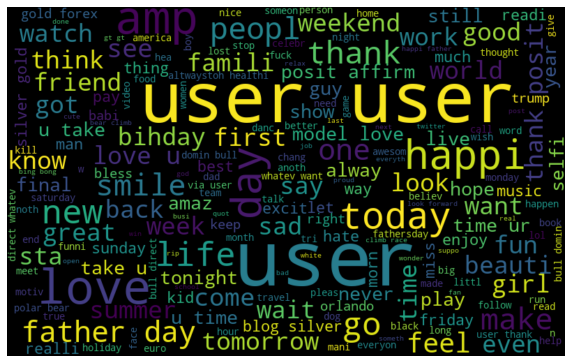

In [40]:
# Creating the 'processed_tweet' column
train_data['processed_tweet'] = train_data['tweet'].apply(preprocess_tweet)

# Creating the 'processed_tweet' column for test_data as well, if needed
test_data['processed_tweet'] = test_data['tweet'].apply(preprocess_tweet)

# Creating a word cloud for the entire vocabulary
all_words = ' '.join([tweet for tweet in train_data['processed_tweet']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()



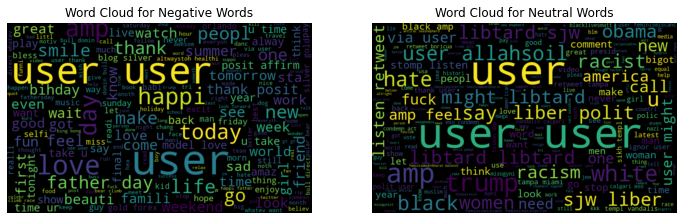

In [41]:
# Creating word clouds for neutral and negative words
negative_words = ' '.join([tweet for tweet in train_data['processed_tweet'][train_data['label'] == 0]])
neutral_words = ' '.join([tweet for tweet in train_data['processed_tweet'][train_data['label'] == 1]])

negative_wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)
neutral_wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(neutral_words)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Word Cloud for Negative Words")

plt.subplot(1, 2, 2)
plt.imshow(neutral_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Word Cloud for Neutral Words")

plt.show()



In [42]:
# Collecting hashtags from non-racist/sexist and racist/sexist tweets and creating frequency distributions
def hashtag_extract(x):
    hashtags = []
    for tweet in x:
        ht = re.findall(r"#(\w+)", tweet)
        hashtags.append(ht)
    return hashtags


In [43]:
# Hashtags from non-racist/sexist tweets
non_racist_sexist_ht = hashtag_extract(train_data['tweet'][train_data['label'] == 0])

# Hashtags from racist/sexist tweets
racist_sexist_ht = hashtag_extract(train_data['tweet'][train_data['label'] == 1])


In [44]:
#how many numbers of hashtags there are (gets the sum of racist w non racist)
# Unnesting the list
non_racist_sexist_ht = sum(non_racist_sexist_ht, [])
racist_sexist_ht = sum(racist_sexist_ht, [])


In [45]:
#how fregquent is the word in inside the text 
# Creating frequency distributions
non_racist_sexist_freq = nltk.FreqDist(non_racist_sexist_ht)
racist_sexist_freq = nltk.FreqDist(racist_sexist_ht)



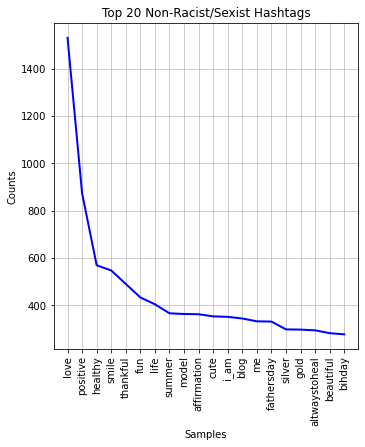

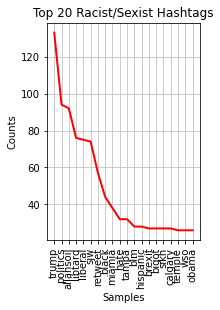

In [46]:
# Visualizing the top 20 positive and negative hashtags
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
non_racist_sexist_freq.plot(20, color='blue', title='Top 20 Non-Racist/Sexist Hashtags')

plt.subplot(1, 2, 2)
racist_sexist_freq.plot(20, color='red', title='Top 20 Racist/Sexist Hashtags')

plt.show()



In [47]:
# we initatlize the vectorizer word embedding it turns the words into values 
# Preprocessing the tweets in train_data
train_data['processed_tweet'] = train_data['tweet'].apply(preprocess_tweet)

# we seprate the words and out them in an array 
# Tokenizing the preprocessed tweets
tokenized_tweet = train_data['processed_tweet'].apply(lambda x: x.split())

# we convert the words into numbers 
# Creating and training a Word2Vec model
model_w2v = gensim.models.Word2Vec(
    tokenized_tweet,
    vector_size=200,  # desired number of features/independent variables
    window=5,  # context window size
    min_count=2,  # minimum frequency count of words
    sg=1,  # skip-gram model (set to 0 for CBOW)
    hs=0,  # negative sampling (set to 1 for hierarchical softmax)
    negative=10,  # negative samples for negative sampling
    workers=2,  # number of worker threads for training
    seed=34  # random seed for reproducibility
)





In [48]:
def word_vector(tokens, size): # we vectorize the words , we turn those words to numbers (here we use it)
    vec = np.zeros((1, size)) 
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v.wv[word].reshape((1, size))
            count += 1.
        except KeyError:
            continue
    if count != 0:
        vec /= count
    return vec


In [49]:
# Tokenizing the words in the test set
tokenized_test_tweet = test_data['processed_tweet'].apply(lambda x: x.split())

# Creating Word2Vec features for train_data
wordvec_arrays_train = np.zeros((len(tokenized_tweet), 200))

for i in range(len(tokenized_tweet)):
    wordvec_arrays_train[i, :] = word_vector(tokenized_tweet[i], 200)

wordvec_df_train = pd.DataFrame(wordvec_arrays_train)
print("Word2Vec Features for Train Data:")
print(wordvec_df_train.head())


# we are doing a feature vetor  so we can sva ethem( unique words)
# fearures the things we are tryimg ti search for 


Word2Vec Features for Train Data:
        0         1         2         3         4         5         6     
0 -0.121491 -0.296199 -0.032337 -0.043668 -0.041273  0.061767 -0.221713  \
1 -0.073297 -0.217527 -0.021419 -0.030436 -0.071107  0.041528 -0.163748   
2 -0.193903 -0.325610 -0.140338 -0.077157  0.141799  0.179910  0.074674   
3 -0.145091 -0.463466  0.109953  0.089387  0.156072  0.223915 -0.004626   
4 -0.047531 -0.213673 -0.156721 -0.074612 -0.027352  0.095006 -0.257172   

        7         8         9    ...       190       191       192       193   
0 -0.019737  0.123769 -0.187721  ...  0.225017 -0.234973 -0.062703  0.014630  \
1 -0.016458  0.120476 -0.178903  ...  0.182361 -0.150494 -0.100526  0.101650   
2  0.016267  0.078697 -0.158497  ...  0.279674 -0.231366  0.122390  0.005186   
3 -0.034449  0.127514 -0.212628  ...  0.348634 -0.524565  0.007353 -0.137091   
4 -0.021427  0.216510 -0.062174  ...  0.108504 -0.161733 -0.132956 -0.047059   

        194       195       196   

In [50]:
# Creating Word2Vec features for test_data
wordvec_arrays_test = np.zeros((len(tokenized_test_tweet), 200))

for i in range(len(tokenized_test_tweet)):
    wordvec_arrays_test[i, :] = word_vector(tokenized_test_tweet[i], 200)

wordvec_df_test = pd.DataFrame(wordvec_arrays_test)
print("Word2Vec Features for Test Data:")
print(wordvec_df_test.head())

#we are creating a feature vecor  and applying it for testing 

Word2Vec Features for Test Data:
        0         1         2         3         4         5         6     
0 -0.119127 -0.242307 -0.041048 -0.036454 -0.071231  0.023358 -0.175346  \
1 -0.098706 -0.233819 -0.054776 -0.052605 -0.035810  0.049921 -0.181634   
2 -0.101258 -0.259142 -0.022779 -0.067963 -0.061217  0.048057 -0.186260   
3 -0.093041 -0.275232 -0.032103 -0.030172 -0.029298  0.059200 -0.176137   
4 -0.110875 -0.245404 -0.049996 -0.086314 -0.059642  0.033689 -0.160054   

        7         8         9    ...       190       191       192       193   
0 -0.061695  0.107341 -0.204832  ...  0.217028 -0.215417 -0.105600  0.092561  \
1 -0.002498  0.119827 -0.195240  ...  0.232756 -0.199949 -0.056646  0.066650   
2  0.014233  0.126407 -0.198587  ...  0.238482 -0.206584 -0.066795  0.096664   
3 -0.001204  0.109150 -0.178550  ...  0.250114 -0.248437 -0.053722  0.046943   
4 -0.028291  0.094844 -0.197089  ...  0.197736 -0.218797 -0.079292  0.096121   

        194       195       196    

In [51]:
# Splitting the dataset into train and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(wordvec_df_train, train_data['label'], random_state=42, test_size=0.2)

# Standardizing the features
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_valid_scaled = sc.transform(X_valid)
X_test_scaled = sc.transform(wordvec_df_test)

# normzaliztion for the features and make tegm same scale 

In [53]:

from sklearn.metrics import f1_score, confusion_matrix, accuracy_score

# Training a Random Forest classifier
rf = RandomForestClassifier(n_estimators=400, random_state=42)
rf.fit(X_train_scaled, y_train)

# Predicting on the validation set
y_valid_pred_rf = rf.predict(X_valid_scaled) # we predict the lables for the validation 

# Evaluating the Random Forest classifier
f1_score_valid_rf = f1_score(y_valid, y_valid_pred_rf)
confusion_matrix_valid_rf = confusion_matrix(y_valid, y_valid_pred_rf) # we use it to validate 
accuracy_valid_rf = accuracy_score(y_valid, y_valid_pred_rf)

print("Random Forest Classifier:")
print("F1 Score (Validation):", f1_score_valid_rf)
print("Accuracy (Validation):", accuracy_valid_rf)
print("Confusion Matrix (Validation):")
print(confusion_matrix_valid_rf)

# Training a Logistic Regression classifier
lr = LogisticRegression(random_state=42)
lr.fit(X_train_scaled, y_train)

# Predicting on the validation set
y_valid_pred_lr = lr.predict(X_valid_scaled)

# Evaluating the Logistic Regression classifier
f1_score_valid_lr = f1_score(y_valid, y_valid_pred_lr)
confusion_matrix_valid_lr = confusion_matrix(y_valid, y_valid_pred_lr)
accuracy_valid_lr = accuracy_score(y_valid, y_valid_pred_lr)

print("Logistic Regression Classifier:")
print("F1 Score (Validation):", f1_score_valid_lr)
print("Accuracy (Validation):", accuracy_valid_lr)
print("Confusion Matrix (Validation):")
print(confusion_matrix_valid_lr)



Random Forest Classifier:
F1 Score (Validation): 0.5337331334332833
Accuracy (Validation): 0.9513530423901142
Confusion Matrix (Validation):
[[5904   33]
 [ 278  178]]
Logistic Regression Classifier:
F1 Score (Validation): 0.4871060171919771
Accuracy (Validation): 0.9440012513686845
Confusion Matrix (Validation):
[[5865   72]
 [ 286  170]]


In [54]:

from sklearn.metrics import f1_score, confusion_matrix, accuracy_score

# Training a Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)

# Predicting on the validation set
y_valid_pred_dt = dt.predict(X_valid_scaled)

# Evaluating the Decision Tree classifier
f1_score_valid_dt = f1_score(y_valid, y_valid_pred_dt)
confusion_matrix_valid_dt = confusion_matrix(y_valid, y_valid_pred_dt)
accuracy_valid_dt = accuracy_score(y_valid, y_valid_pred_dt)

print("Decision Tree Classifier:")
print("F1 Score (Validation):", f1_score_valid_dt)
print("Accuracy (Validation):", accuracy_valid_dt)
print("Confusion Matrix (Validation):")
print(confusion_matrix_valid_dt)


Decision Tree Classifier:
F1 Score (Validation): 0.46185147507629704
Accuracy (Validation): 0.9172532457375254
Confusion Matrix (Validation):
[[5637  300]
 [ 229  227]]


In [56]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
#the above  codes imports the necessary modules and classes from PyTorch.
# Define the custom dataset.
#It defines a custom dataset class called TweetDataset, which inherits from the Dataset class provided by PyTorch.
class TweetDataset(Dataset):
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]

#The TweetDataset class holds the data and labels and provides methods to retrieve the length of the dataset and individual data-label pairs
#It defines a custom dataset class called TweetDataset, which inherits from the Dataset class provided by PyTorch.
#The TweetDataset class holds the data and labels and provides methods to retrieve the length of the dataset and individual data-label pairs.
# Convert your data to tensors
train_data_tensor = torch.tensor(wordvec_df_train.values, dtype=torch.float32)  # Convert the training data to a PyTorch tensor
train_labels_tensor = torch.tensor(train_data['label'].values, dtype=torch.long)  # Convert the training labels to a PyTorch tensor of integer type

valid_data_tensor = torch.tensor(X_valid_scaled, dtype=torch.float32)  # Convert the validation data to a PyTorch tensor.
valid_labels_tensor = torch.tensor(y_valid.values, dtype=torch.long)  # Convert the validation labels to a PyTorch tensor of integer type.


# Define your model architecture
class Net(nn.Module):  # Define a class for your neural network model that inherits from the nn.Module class in PyTorch
    def __init__(self, input_size, num_classes):  # Define the initialization method that takes input_size and num_classes as input
        super(Net, self).__init__()  # Call the initialization method of the parent class
        self.fc1 = nn.Linear(input_size, 128)  # Define the first fully connected layer with input_size as input and 128 as output size
        self.fc2 = nn.Linear(128, 64)  # Define the second fully connected layer with 128 as input size and 64 as output size
        self.fc3 = nn.Linear(64, num_classes)  # Define the third fully connected layer with 64 as input size and num_classes as output size
    
    def forward(self, x):  # Define the forward method that describes the forward pass of the network
        x = torch.relu(self.fc1(x))  # Apply ReLU activation to the output of the first fully connected layer
        x = torch.relu(self.fc2(x))  # Apply ReLU activation to the output of the second fully connected layer
        x = self.fc3(x)  # Obtain the final output of the network
        return x


# Instantiate your model
model = Net(input_size=train_data_tensor.size(1), num_classes=2)  # Create an instance of the Net class with appropriate input size and number of classes

# Define your loss function and optimizer
criterion = nn.CrossEntropyLoss()  # Define the cross-entropy loss function
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Define the Adam optimizer with a learning rate of 0.001

# Define the training loop
def train(model, criterion, optimizer, train_loader, valid_data, valid_labels, num_epochs):  # Define a function for the training loop that takes the model, loss function, optimizer, data loaders, validation data, validation labels, and number of epochs as input
    for epoch in range(num_epochs):  # Iterate over the number of epochs
        model.train()  # Set the model to training mode
        train_loss = 0.0  # Initialize the training loss to 0
        for data, labels in train_loader:  # Iterate over the training data batches
            optimizer.zero_grad()  # Reset the gradients to zero
            outputs = model(data)  # Perform a forward pass through the model
            loss = criterion(outputs, labels)  # Compute the loss between the predicted outputs and the actual labels
            loss.backward()  # Perform backpropagation to compute the gradients
            optimizer.step()  # Update the model parameters using the optimizer
            train_loss += loss.item() * data.size(0)  # Update the training loss
        
        model.eval()  # Set the model to evaluation mode
        with torch.no_grad():  # Disable gradient calculation during validation
            valid_outputs = model(valid_data)  # Perform a forward pass through the model on the validation data
            valid_loss = criterion(valid_outputs, valid_labels)  # Compute the loss between the predicted outputs and the actual labels for validation
            valid_preds = torch.argmax(valid_outputs, dim=1)  # Get the predicted labels by finding the index of the maximum output value
            valid_acc = torch.sum(valid_preds == valid_labels).item() / len(valid_labels)  # Compute the accuracy by comparing the predicted labels with the actual labels
        
        train_loss /= len(train_loader.dataset)  # Compute the average training loss
        valid_loss /= len(valid_labels)  # Compute the average validation loss
        
        print(f"Epoch {epoch+1}/{num_epochs}: Train Loss: {train_loss:.4f}, Valid Loss: {valid_loss:.4f}, Valid Acc: {valid_acc:.4f}")  # Print the training and validation losses, and validation accuracy for the current epoch


# Create your data loaders
train_dataset = TweetDataset(train_data_tensor, train_labels_tensor)  # Create an instance of the TweetDataset class for the training data
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)  # Create a data loader for the training data with a batch size of 32 and shuffle the data

# Train your model
num_epochs = 10  # Specify the number of epochs for training
train(model, criterion, optimizer, train_loader, valid_data_tensor, valid_labels_tensor, num_epochs)  # Call the train function to train the model



Epoch 1/60: Train Loss: 0.1692, Valid Loss: 0.0001, Valid Acc: 0.8750
Epoch 2/60: Train Loss: 0.1481, Valid Loss: 0.0001, Valid Acc: 0.9115
Epoch 3/60: Train Loss: 0.1441, Valid Loss: 0.0001, Valid Acc: 0.9252
Epoch 4/60: Train Loss: 0.1416, Valid Loss: 0.0001, Valid Acc: 0.9243
Epoch 5/60: Train Loss: 0.1402, Valid Loss: 0.0001, Valid Acc: 0.9301
Epoch 6/60: Train Loss: 0.1373, Valid Loss: 0.0001, Valid Acc: 0.9366
Epoch 7/60: Train Loss: 0.1369, Valid Loss: 0.0001, Valid Acc: 0.9374
Epoch 8/60: Train Loss: 0.1354, Valid Loss: 0.0001, Valid Acc: 0.9392
Epoch 9/60: Train Loss: 0.1349, Valid Loss: 0.0001, Valid Acc: 0.9365
Epoch 10/60: Train Loss: 0.1330, Valid Loss: 0.0002, Valid Acc: 0.9393
Epoch 11/60: Train Loss: 0.1321, Valid Loss: 0.0002, Valid Acc: 0.9377
Epoch 12/60: Train Loss: 0.1319, Valid Loss: 0.0002, Valid Acc: 0.9387
Epoch 13/60: Train Loss: 0.1302, Valid Loss: 0.0002, Valid Acc: 0.9365
Epoch 14/60: Train Loss: 0.1306, Valid Loss: 0.0002, Valid Acc: 0.9370
Epoch 15/60: Tr

In [ ]:
import torch

# Save the Random Forest model
torch.save(rf, 'random_forest_model.pt')

# Save the Logistic Regression model
torch.save(lr, 'logistic_regression_model.pt')

# Save the Decision Tree model
torch.save(dt, 'decision_tree_model.pt')

# Save the model using pytorch
torch.save(model.state_dict(), 'model.pt')